In [4]:
#### Import librairies
import numpy as np
import pandas as pd
import nltk 
from nltk.corpus import stopwords
### Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score , precision_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
#vis
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#os
import time
start_time = time.time()

In [12]:
col_names = ["type","sentence"]

# df = pd.read_csv ("./data/SMSSpamCollection.txt", header=None, sep='\t', names=col_names)
# df['type_bool'] = df['type'].replace({'ham':0, 'spam':1}) #Bool col_type spam or ham
# df.to_csv ("./data/SMSSpamCollection.csv", index=None)

df = pd.read_csv("/home/joshua/Documents/git-workspace/audit/2020/12-december/01-chat-bot/data/SMSSpamCollection.csv")

x = df['sentence'] ## SMS content as Corpus
y = df['type_bool'] ## Spam or Not as Target

In [13]:
def get_top_n_words(corpus,d,n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    if d == "up" :
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]
    elif d == "down" :
        words_freq=sorted(words_freq, key = lambda x: x[1], reverse=False)
        return words_freq[:n]

freq_top = get_top_n_words(x,"up",100)
freq_down = get_top_n_words(x,"down",100)

df_up = pd.DataFrame(freq_top, columns =['Word','Number of times'])
df_down = pd.DataFrame(freq_down, columns =['Word','Number of times'])

In [14]:
import plotly.express as px
fig = px.bar(df_up, x='Word', y='Number of times')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

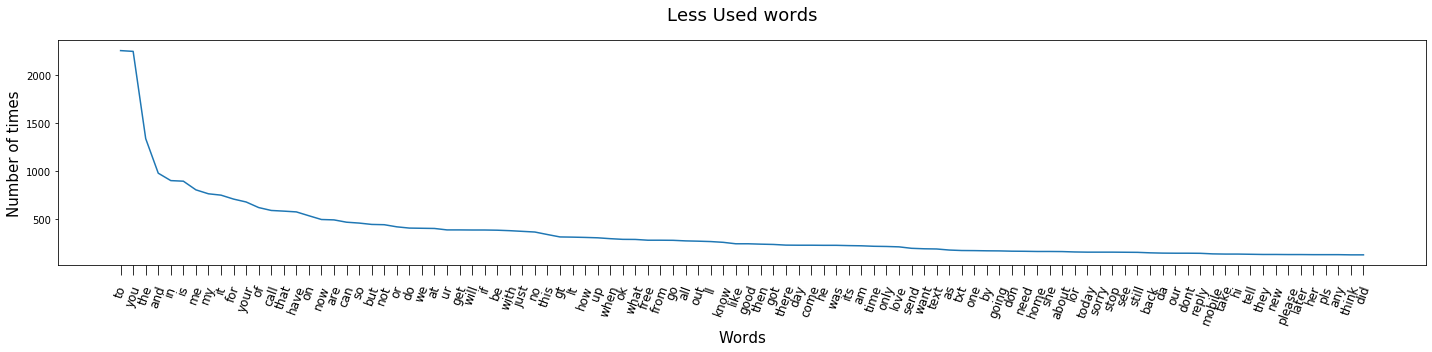

In [15]:
y_nbr = df_up['Number of times']
x_word = df_up['Word']
fig, ax = plt.subplots(figsize=(20, 5),tight_layout=True)
ax.set_title('Less Used words',size=18,pad=20)
ax.set_xlabel('Words',size=15)
ax.set_ylabel('Number of times',size=15)
ax.plot(x_word, y_nbr)
ax.tick_params(axis='x',labelsize=12,pad=8,size=10, rotation=70)
plt.show()